<a href="https://colab.research.google.com/github/BintangPray/Kelompok-5-P2/blob/main/GARCH%20HARGA%20CABAI%20RAWIT%20MERAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 11.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Impor Data

In [3]:
data = pd.read_excel("MPDW.xlsx")
lambda_bc = -0.3535354
data['Boxcox'] = data['Harga']**lambda_bc
data['Diff'] = np.diff(data['Boxcox'], prepend=data['Boxcox'][0])

In [4]:
data['DiffA'] = data['Diff']*(10**5)
print(data.head())
print(data.shape)

     Tanggal  Harga    Boxcox      Diff      DiffA
0 2022-09-01  62070  0.020209  0.000000   0.000000
1 2022-09-02  57760  0.020730  0.000521  52.076902
2 2022-09-03  59920  0.020463 -0.000267 -26.732745
3 2022-09-04  59450  0.020520  0.000057   5.704686
4 2022-09-05  61310  0.020297 -0.000222 -22.227596
(700, 5)


In [5]:
print(data.tail())

       Tanggal  Harga    Boxcox      Diff      DiffA
695 2024-07-27  75460  0.018861  0.000563  56.270016
696 2024-07-28  69540  0.019413  0.000553  55.271305
697 2024-07-29  79400  0.018524 -0.000889 -88.904388
698 2024-07-30  84850  0.018095 -0.000430 -42.970163
699 2024-07-31  78630  0.018588  0.000494  49.363180


In [12]:
from google.colab import files

data['DiffA'].to_excel("data_differencing_rescaling.xlsx", index=False)
files.download("data_differencing_rescaling.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Splitting Data

_Splitting_ data dilakukan dengan membagi data menjadi data latih sebanyak 578 amatan dan data uji sebanyak 122 amatan.

Jumlah data latih: 578
Jumlah data uji: 122


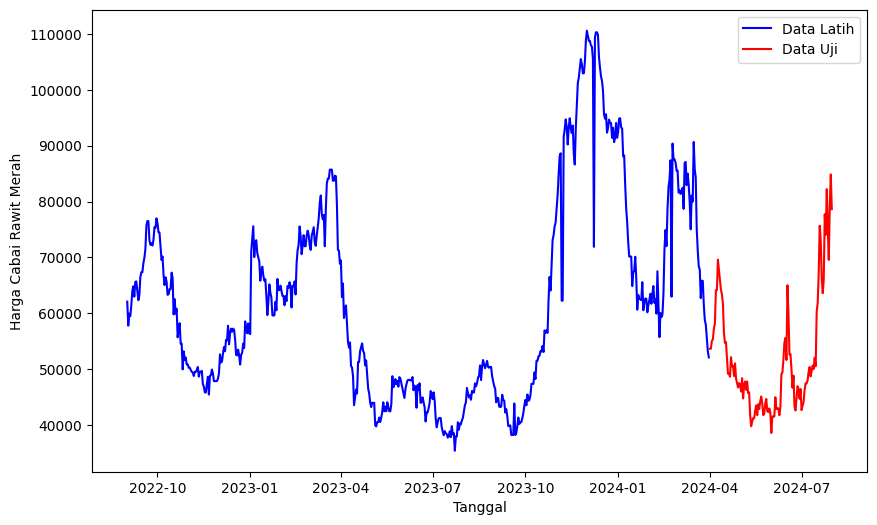

In [7]:
test_size = 122
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))

plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['Harga'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['Harga'], label='Data Uji', color='red')
plt.ylabel('Harga Cabai Rawit Merah')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

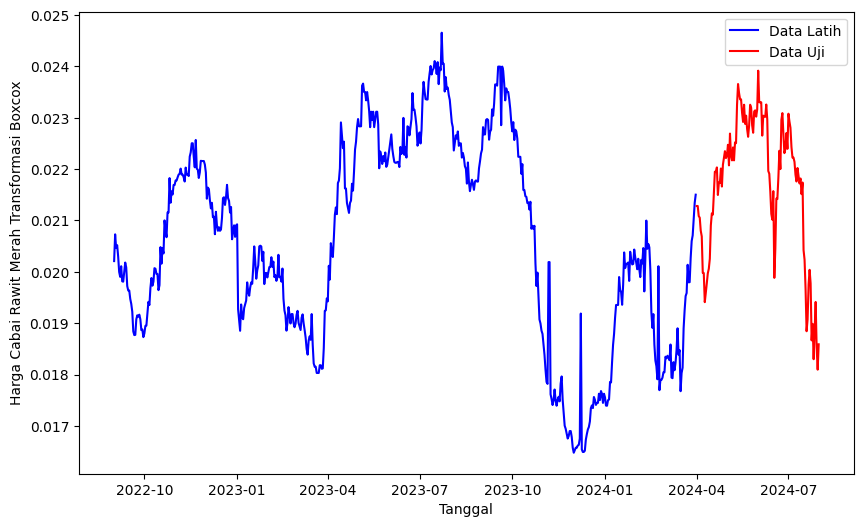

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['Boxcox'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['Boxcox'], label='Data Uji', color='red')
plt.ylabel('Harga Cabai Rawit Merah Transformasi Boxcox')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

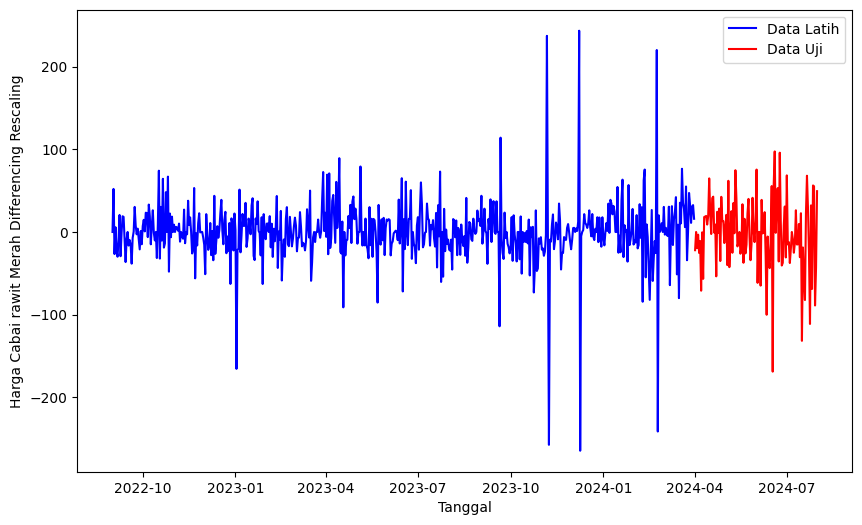

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['DiffA'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['DiffA'], label='Data Uji', color='red')
plt.ylabel('Harga Cabai rawit Merah Differencing Rescaling')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

In [10]:
data_diffA = data['DiffA'][1:]
train_data_diffA = data_diffA.iloc[:-test_size]
test_data_diffA = data_diffA.iloc[-test_size:]

print(train_data_diffA.head())
print(train_data_diffA.shape)

print(test_data_diffA.head())
print(test_data_diffA.shape)

1    52.076902
2   -26.732745
3     5.704686
4   -22.227596
5   -29.917305
Name: DiffA, dtype: float64
(577,)
578   -22.039107
579     0.000000
580   -19.575676
581    -3.241074
582   -25.389337
Name: DiffA, dtype: float64
(122,)


In [11]:
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diag

model = sm.tsa.ARIMA(train_data_diffA, order=(1, 0, 0)).fit()
residuals = model.resid
residual_squared = residuals**2

results = []

for lag in range(1, 26):
    lm_stat, lm_pvalue, _, _ = diag.het_arch(residual_squared, nlags=lag)
    results.append({"Lag": lag, "Statistik LM": lm_stat, "p-value": lm_pvalue})

results_df = pd.DataFrame(results)
print(results_df)

    Lag  Statistik LM       p-value
0     1     20.128986  7.239121e-06
1     2     47.238203  5.525284e-11
2     3     51.973264  3.034635e-11
3     4     53.443736  6.881175e-11
4     5     53.732748  2.378340e-10
5     6     53.636878  8.731648e-10
6     7     53.640870  2.769681e-09
7     8     53.560450  8.399965e-09
8     9     53.473630  2.376597e-08
9    10     53.399942  6.274910e-08
10   11     53.319434  1.570437e-07
11   12     53.223181  3.759324e-07
12   13     53.134158  8.563688e-07
13   14     53.060177  1.858131e-06
14   15     52.973612  3.895130e-06
15   16     52.903853  7.821275e-06
16   17     52.831495  1.519343e-05
17   18     52.750796  2.866981e-05
18   19     52.671682  5.245661e-05
19   20     52.601731  9.298427e-05
20   21     52.523301  1.608878e-04
21   22     52.440416  2.716854e-04
22   23     52.375952  4.450759e-04
23   24     52.300308  7.148254e-04
24   25     52.214065  1.126169e-03


# Pemodelan GARCH

### Pendugaan Parameter

GARCH(1,1)

In [16]:
# Load your time series data (e.g., 'train_data_partial')
# Specify the GARCH(1, 1) model
model_garch11_diffA = arch_model(train_data_diffA, vol='GARCH', mean = 'constant', p=1, q=1)

# Fit the model
result_garch11_diffA = model_garch11_diffA.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2999.0904037635155
Iteration:      2,   Func. Count:     12,   Neg. LLF: 2916.558393613606
Iteration:      3,   Func. Count:     18,   Neg. LLF: 3229.9335541514315
Iteration:      4,   Func. Count:     25,   Neg. LLF: 2860.3099791859577
Iteration:      5,   Func. Count:     30,   Neg. LLF: 2860.309959061019
Iteration:      6,   Func. Count:     35,   Neg. LLF: 2860.309953046737
Iteration:      7,   Func. Count:     40,   Neg. LLF: 2860.3099181385032
Iteration:      8,   Func. Count:     45,   Neg. LLF: 2860.3097397239553
Iteration:      9,   Func. Count:     50,   Neg. LLF: 2860.3088732829597
Iteration:     10,   Func. Count:     55,   Neg. LLF: 2860.3047160243946
Iteration:     11,   Func. Count:     60,   Neg. LLF: 2860.289250845336
Iteration:     12,   Func. Count:     65,   Neg. LLF: 2860.2774843772036
Iteration:     13,   Func. Count:     70,   Neg. LLF: 2860.2774069019197
Iteration:     14,   Func. Count:     74,   Neg. LLF: 2

In [17]:
# Display model fitting summary
print(result_garch11_diffA.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  DiffA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2860.28
Distribution:                  Normal   AIC:                           5728.55
Method:            Maximum Likelihood   BIC:                           5745.99
                                        No. Observations:                  577
Date:                Mon, Nov 18 2024   Df Residuals:                      576
Time:                        01:34:42   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.4562      1.545      0.943      0.346 [ -1.572,  4.48

GARCH(1,2)

In [18]:
# Load your time series data (e.g., 'train_data_partial')
# Specify the GARCH(1, 2) model
model_garch12_diffA = arch_model(train_data_diffA, vol='GARCH', mean = 'constant', p=1, q=2)

# Fit the model
result_garch12_diffA = model_garch12_diffA.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3976.2186316842653
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2930.216599099571
Iteration:      3,   Func. Count:     22,   Neg. LLF: 2891.5003914587255
Iteration:      4,   Func. Count:     29,   Neg. LLF: 2860.7708352715795
Iteration:      5,   Func. Count:     35,   Neg. LLF: 2917.120745895464
Iteration:      6,   Func. Count:     42,   Neg. LLF: 2860.3319020673266
Iteration:      7,   Func. Count:     48,   Neg. LLF: 2860.3099490450577
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2860.309902758969
Iteration:      9,   Func. Count:     60,   Neg. LLF: 2860.309893063918
Iteration:     10,   Func. Count:     66,   Neg. LLF: 2860.309882194113
Iteration:     11,   Func. Count:     72,   Neg. LLF: 2860.309837209392
Iteration:     12,   Func. Count:     78,   Neg. LLF: 2860.3097533138944
Iteration:     13,   Func. Count:     84,   Neg. LLF: 2860.3094091958615
Iteration:     14,   Func. Count:     90,   Neg. LLF: 286

In [19]:
# Display model fitting summary
print(result_garch12_diffA.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  DiffA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2860.28
Distribution:                  Normal   AIC:                           5730.55
Method:            Maximum Likelihood   BIC:                           5752.34
                                        No. Observations:                  577
Date:                Mon, Nov 18 2024   Df Residuals:                      576
Time:                        01:34:50   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.4563      1.531      0.951      0.342 [ -1.545,  4.45

GARCH(2,1)

In [20]:
# Load your time series data (e.g., 'train_data_partial')
# Specify the GARCH(2, 1) model
model_garch21_diffA = arch_model(train_data_diffA, vol='GARCH', mean = 'constant', p=2, q=1)

# Fit the model
result_garch21_diffA = model_garch21_diffA.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2929.498349048577
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2910.0785070504635
Iteration:      3,   Func. Count:     22,   Neg. LLF: 2936.0721985967034
Iteration:      4,   Func. Count:     29,   Neg. LLF: 2860.6873400770983
Iteration:      5,   Func. Count:     36,   Neg. LLF: 2888.158341683441
Iteration:      6,   Func. Count:     44,   Neg. LLF: 2859.758016004389
Iteration:      7,   Func. Count:     51,   Neg. LLF: 2859.6698270557526
Iteration:      8,   Func. Count:     57,   Neg. LLF: 2859.6697771248932
Iteration:      9,   Func. Count:     63,   Neg. LLF: 2859.669711041269
Iteration:     10,   Func. Count:     69,   Neg. LLF: 2859.6692754984037
Iteration:     11,   Func. Count:     75,   Neg. LLF: 2859.6677301188884
Iteration:     12,   Func. Count:     81,   Neg. LLF: 2859.664846499598
Iteration:     13,   Func. Count:     87,   Neg. LLF: 2859.655827233176
Iteration:     14,   Func. Count:     93,   Neg. LLF: 285

In [21]:
# Display model fitting summary
print(result_garch21_diffA.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  DiffA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2858.46
Distribution:                  Normal   AIC:                           5726.92
Method:            Maximum Likelihood   BIC:                           5748.71
                                        No. Observations:                  577
Date:                Mon, Nov 18 2024   Df Residuals:                      576
Time:                        01:34:57   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.5622      1.535      1.018      0.309 [ -1.446,  4.57

Model GARCH(1,1) dipilih sebagai model tentatif terbaik karena memiliki seluruh parameter signifikan

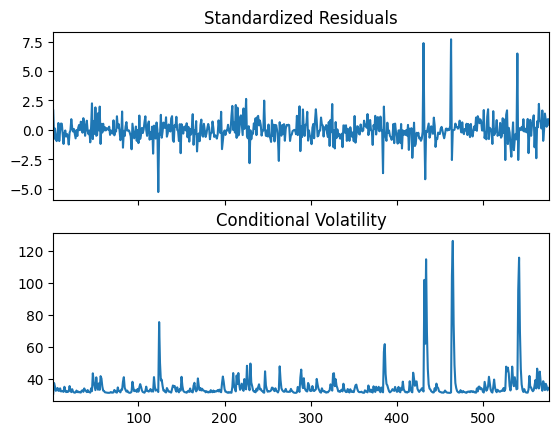

In [22]:
fig = result_garch11_diffA.plot()

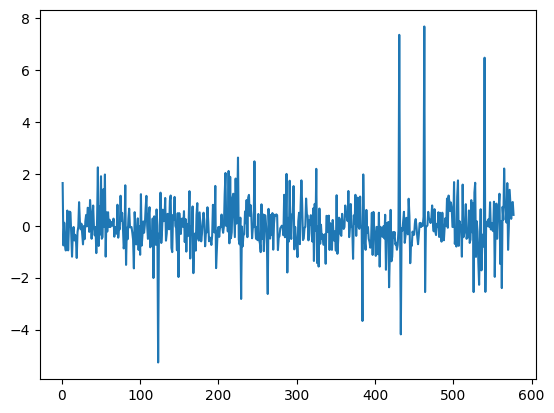

In [23]:
garch_stresidual = result_garch11_diffA.resid / result_garch11_diffA.conditional_volatility
plt.plot(garch_stresidual)

### Diagnostik Sisaan: Uji Kebebasan Sisaan (Ljung-Box)

$H_0$: Sisaan saling bebas

$H_1$: Sisaan tidak saling bebas

In [24]:
import statsmodels.api as sm
result_df = sm.stats.acorr_ljungbox(abs(garch_stresidual), lags=[10], return_df=True)
print(result_df)

     lb_stat  lb_pvalue
10  4.462929   0.924057


### Diagnostik Sisaan: Uji Normalitas Sisaan (Kolmogorov-Smirnov)

$H_0$: Sisaan menyebar normal

$H_1$: Sisaan tidak menyebar normal

In [25]:
from scipy import stats
result_norm = stats.kstest(garch_stresidual, 'norm')
print(result_norm.pvalue)

2.6984149222930573e-05


### Diagnostik Sisaan: Uji Nilai Harapan Sisaan (t-test)

$H_0$: Nilai harapan sisaan nol

$H_1$: Nilai harapan sisaan tidak nol

In [26]:
result_harapan = stats.ttest_1samp(garch_stresidual, 0)
print(result_harapan.pvalue)

0.8324486435310421


### Diagnostik Sisaan: Ragam Sisaan Homogen (Arch-LM)

$H_0$: Ragam sisaan homogen

$H_1$: Ragam sisaan tidak homogen / Ada heteroskedastisitas

In [27]:
from statsmodels.stats.diagnostic import het_arch
arch_lm_test = het_arch(garch_stresidual)
print(f"LM Statistic: {arch_lm_test[0]}")
print(f"p-value: {arch_lm_test[1]}")

LM Statistic: 4.210452992667804
p-value: 0.9373540281525725


In [28]:
from google.colab import files

garch_stresidual.to_excel("data_garch_stresidual.xlsx", index=False)
files.download("data_garch_stresidual.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
result_garch11_diffA.resid.to_excel("data_garch_stresidual_nonnormal.xlsx", index=False)
files.download("data_garch_stresidual_nonnormal.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Prediksi

Pendugaan nilai amatan menggunakan model GARCH(1,1) dilakukan pada data latih dan uji untuk menghitung nilai keakuratan model.

In [30]:
np.random.seed(42)
epsilon_train = np.random.normal(0, 1, 577)

### Prediksi pada Data Latih

In [31]:
predicted_train = result_garch11_diffA.conditional_volatility * epsilon_train + 1.4562
predicted_train

,cond_vol
1,16.692131
2,-3.704261
3,24.195049
4,50.875114
5,-6.273391
...,...
573,13.497949
574,-6.303338
575,28.609609
576,-73.403789


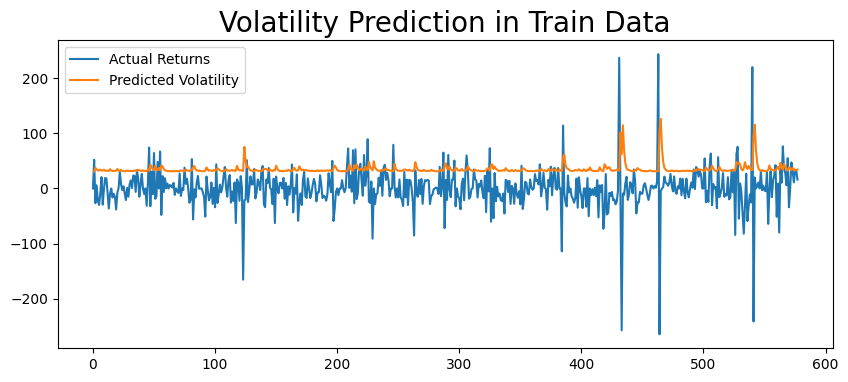

In [32]:
plt.figure(figsize=(10,4))
true, = plt.plot(train_data['DiffA'])
preds, = plt.plot(result_garch11_diffA.conditional_volatility)
plt.title('Volatility Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Volatility'], fontsize=10)

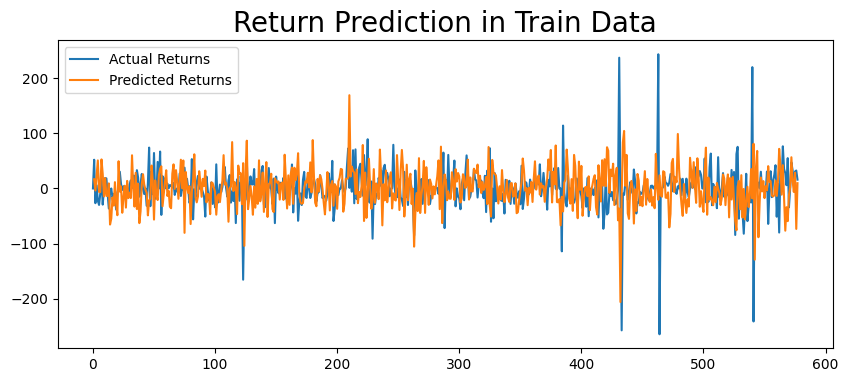

In [33]:
plt.figure(figsize=(10,4))
true, = plt.plot(train_data['DiffA'])
preds, = plt.plot(predicted_train)
plt.title('Return Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Returns'], fontsize=10)

In [34]:
from google.colab import files

predicted_train.to_excel("data_prediksi_harga_latih.xlsx", index=False)
files.download("data_prediksi_harga_latih.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Prediksi pada Data Uji

In [35]:
condvar_test = []

for i in range(test_size):
    train = data_diffA[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    condvar_test.append(np.sqrt(pred.variance.values[-1,:][0]))

In [36]:
condvar_test

[32.72916591281901,
 33.05657353097537,
 31.70508044406144,
 32.428596169132945,
 31.523934882458157,
 33.05498781540611,
 32.038042904351954,
 43.158630844016706,
 35.21948699842364,
 40.096328190393386,
 34.85907315005445,
 33.118949911570596,
 32.60855717083582,
 31.73348695758781,
 32.12747058940726,
 40.68126010368565,
 35.533294851221086,
 32.59542523522714,
 35.40876385370566,
 36.555879829076304,
 32.92359709053812,
 31.83077328338614,
 38.40055544135296,
 34.82784200147726,
 32.35664267444192,
 33.316932452472365,
 35.03788339070688,
 36.35968799870112,
 33.183261016141195,
 32.107609684469615,
 31.967342547752985,
 31.379055856084847,
 32.07820692186642,
 35.5136465071074,
 40.62087383358247,
 38.6263041623697,
 33.86259731123132,
 33.34102161590827,
 33.53445454553477,
 34.573785604982916,
 32.191070935714734,
 42.9901840519187,
 38.50513789077743,
 34.44070568201053,
 32.66798056440426,
 31.605518472724654,
 33.18042974149507,
 32.6671124956427,
 34.05721359049265,
 35.5739

In [37]:
condvar_test = pd.Series(condvar_test, index=data_diffA.index[-122:])
print(condvar_test)

578    32.729166
579    33.056574
580    31.705080
581    32.428596
582    31.523935
         ...    
695    46.831724
696    44.330887
697    43.244913
698    52.714135
699    44.322066
Length: 122, dtype: float64


In [38]:
np.random.seed(42)
epsilon_test = np.random.normal(0, 1, 122)

In [39]:
predicted_test = condvar_test * epsilon_test + 1.4562
predicted_test

,0
578,17.713240
579,-3.114344
580,21.991217
581,50.845920
582,-5.925236
...,...
695,-53.275007
696,52.118549
697,33.973478
698,43.154765


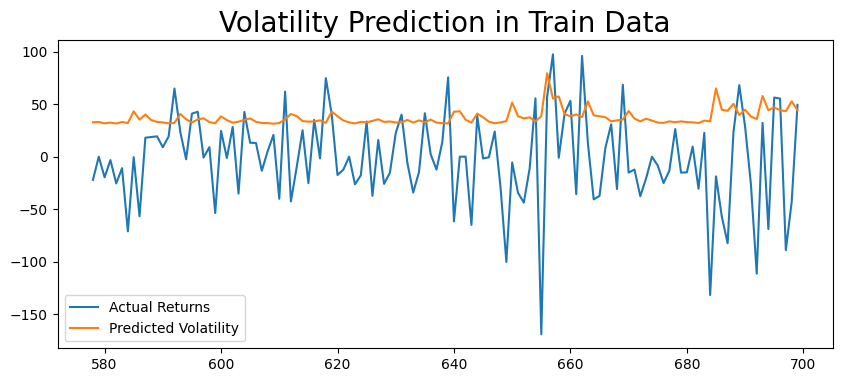

In [40]:
plt.figure(figsize=(10,4))
true, = plt.plot(test_data['DiffA'])
preds, = plt.plot(condvar_test)
plt.title('Volatility Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Volatility'], fontsize=10)

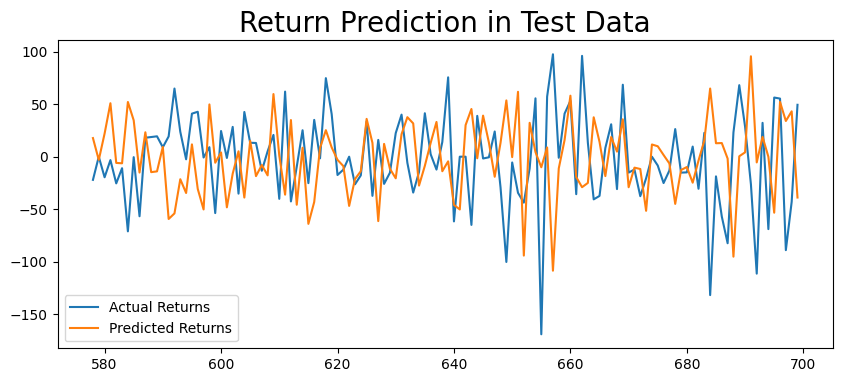

In [41]:
plt.figure(figsize=(10,4))
true, = plt.plot(data_diffA[-122:])
preds, = plt.plot(predicted_test)
plt.title('Return Prediction in Test Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Returns'], fontsize=10)

In [42]:
from google.colab import files

predicted_test.to_excel("data_prediksi_harga_uji.xlsx", index=False)
files.download("data_prediksi_harga_uji.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Transformasi Balik

In [43]:
pt_1 = data['Harga'][577]
hasil_prediksi_test_balik = np.r_[pt_1, predicted_test].cumsum()

pt = data['Harga'][0]
hasil_prediksi_train_balik = np.r_[pt, predicted_train].cumsum()

pt = 0
residual_nonnormal_train_balik = np.r_[pt, result_garch11_diffA.resid].cumsum()

pt = 0
residual_train_balik = np.r_[pt, garch_stresidual].cumsum()

In [44]:
A_prediksi_test = pd.DataFrame(hasil_prediksi_test_balik, columns=['Prediksi_Uji'])
A_prediksi_train = pd.DataFrame(hasil_prediksi_train_balik, columns=['Prediksi_Train'])
A_residual_nonnormal_train = pd.DataFrame(residual_nonnormal_train_balik, columns=['Residual_non'])
A_residual_train_balik = pd.DataFrame(residual_train_balik, columns=['Residual'])

A_prediksi_test.to_excel("data_prediksi_harga_uji_transform_balik.xlsx", index=False)
files.download("data_prediksi_harga_uji_transform_balik.xlsx")

A_prediksi_train.to_excel("data_prediksi_harga_latih_transform_balik.xlsx", index=False)
files.download("data_prediksi_harga_latih_transform_balik.xlsx")

A_residual_nonnormal_train.to_excel("data_residual_latih_nonnormal_transform_balik.xlsx", index=False)
files.download("data_residual_latih_nonnormal_transform_balik.xlsx")

A_residual_train_balik.to_excel("data_residual_latih_transform_balik.xlsx", index=False)
files.download("data_residual_latih_transform_balik.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
print(hasil_prediksi_test_balik)

[52080.         52097.71323993 52094.59889589 52116.59011309
 52167.43603326 52161.51079752 52155.22760326 52207.2786912
 52241.85632337 52226.77787634 52249.98874191 52235.29063066
 52221.32235028 52230.66859084 52171.40973715 52117.44869022
 52096.03032499 52061.49729816 52073.19652359 52042.50071353
 51992.32890914 52042.03953868 52036.30910445 52040.35842502
 51992.1937203  51976.035523   51981.18732343 51942.31514468
 51957.43160741 51938.95665698 51931.04726792 51913.26850653
 51972.84744715 51973.87068038 51937.76370834 51972.63240144
 51926.93192328 51935.46078709 51871.57958313 51828.49578844
 51836.75822661 51861.98645667 51870.80981062 51867.81295756
 51858.8989338  51812.05480615 51790.75995673 51776.93196435
 51812.92129503 51826.08017652 51764.8181223  51776.97830886
 51765.531235   51744.97452197 51766.36284648 51803.95177896
 51835.62906029 51808.12364995 51799.45114052 51812.59933534
 51845.66058398 51831.83071226 51827.41214084 51781.56141683
 51731.35674693 51761.423

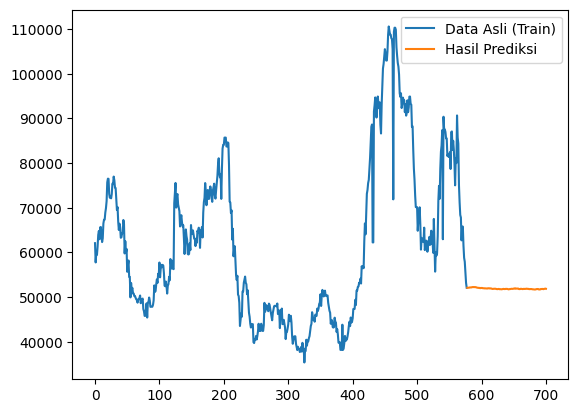

In [46]:
plt.plot(train_data['Harga'], label='Data Asli (Train)')
plt.plot(range(578, 578 + len(hasil_prediksi_test_balik)), hasil_prediksi_test_balik, label='Hasil Prediksi')
plt.legend()
plt.show()

In [50]:
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Hitung MAPE
mape_value = calculate_mape(test_data['Harga'], hasil_prediksi_test_balik[-1])
print(f'MAPE: {mape_value:.2f}%')

MAPE: 15.14%


# Prediksi Keseluruhan Data

In [51]:
condvar_test = []

for i in range(699):
    full = data_diffA
    model = arch_model(full, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    condvar_test.append(np.sqrt(pred.variance.values[-1,:][0]))

In [52]:
np.random.seed(42)
epsilon_test = np.random.normal(0, 1, 699)

In [53]:
predicted_penuh = condvar_test * epsilon_test + 1.4562
predicted_penuh

array([ 2.23891165e+01, -4.37064238e+00,  2.87515972e+01,  6.56409161e+01,
       -8.41167476e+00, -8.41098287e+00,  6.80086223e+01,  3.37980349e+01,
       -1.83287570e+01,  2.43211899e+01, -1.80735111e+01, -1.81709477e+01,
        1.16531634e+01, -7.91747533e+01, -7.12366372e+01, -2.22401611e+01,
       -4.12273217e+01,  1.46994570e+01, -3.68104612e+01, -5.80622078e+01,
        6.32227174e+01, -8.05864154e+00,  4.30202645e+00, -5.85866530e+01,
       -2.14856028e+01,  6.13078658e+00, -4.70498721e+01,  1.72891599e+01,
       -2.38563857e+01, -1.08365863e+01, -2.39013909e+01,  7.95163568e+01,
        8.87389393e-01, -4.31186817e+01,  3.61205314e+01, -4.99935485e+01,
        1.02582931e+01, -8.11297519e+01, -5.45172559e+01,  9.75248026e+00,
        3.25772365e+01,  8.67813621e+00, -3.41754042e+00, -1.12331476e+01,
       -6.08528308e+01, -2.88800380e+01, -1.79563996e+01,  4.60062721e+01,
        1.59372309e+01, -7.28432179e+01,  1.51140003e+01, -1.47722388e+01,
       -2.70711767e+01,  

In [54]:
pt_1 = data['Harga'][0]
hasil_prediksi_penuh_balik = np.r_[pt_1, predicted_penuh].cumsum()

hasil_prediksi_penuh_balik

array([62070.        , 62092.38911655, 62088.01847417, 62116.7700714 ,
       62182.41098748, 62173.99931273, 62165.58832986, 62233.59695217,
       62267.3949871 , 62249.06623013, 62273.38742008, 62255.31390901,
       62237.14296127, 62248.79612467, 62169.62137133, 62098.38473416,
       62076.14457308, 62034.9172514 , 62049.61670841, 62012.80624722,
       61954.74403942, 62017.96675681, 62009.90811527, 62014.21014172,
       61955.62348869, 61934.1378859 , 61940.26867248, 61893.21880041,
       61910.5079603 , 61886.65157459, 61875.81498832, 61851.91359739,
       61931.42995418, 61932.31734357, 61889.19866187, 61925.31919325,
       61875.32564476, 61885.58393783, 61804.4541859 , 61749.93693003,
       61759.68941029, 61792.2666468 , 61800.94478302, 61797.5272426 ,
       61786.29409502, 61725.44126426, 61696.5612263 , 61678.60482674,
       61724.61109886, 61740.54832973, 61667.7051118 , 61682.81911206,
       61668.04687324, 61640.97569657, 61668.20963741, 61713.11502612,
      

In [56]:
prediksi_penuh = pd.DataFrame(predicted_penuh, columns=['Residual'])
prediksi_penuh_balik = pd.DataFrame(hasil_prediksi_penuh_balik, columns=['Residual'])

prediksi_penuh.to_excel("data_prediksi_full.xlsx", index=False)
files.download("data_prediksi_full.xlsx")

prediksi_penuh_balik.to_excel("data_prediksi_full_transform_balik.xlsx", index=False)
files.download("data_prediksi_full_transform_balik.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Peramalan

Peramalan (_forecasting_) terhadap data dilakukan hingga 31 periode ke depan.

In [57]:
from datetime import datetime, timedelta

data_diffA.index = pd.to_datetime(data_diffA.index)

pred = result_garch11_diffA.forecast(horizon=31)
future_dates = [data_diffA.index[-1] + timedelta(days=i) for i in range(1,32)]
condvar_forecast = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 1 Month')

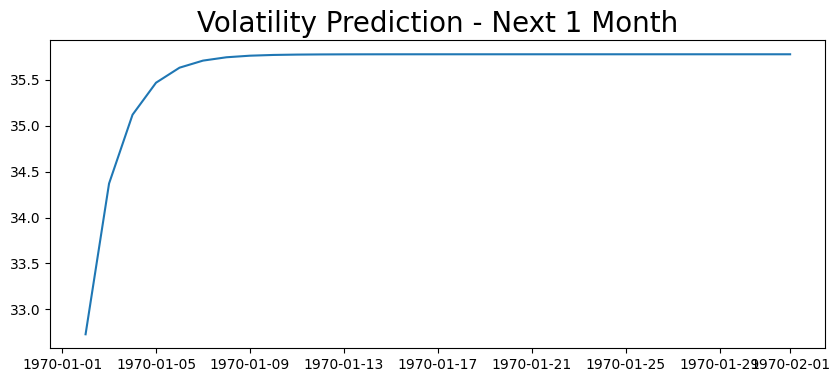

In [58]:
plt.figure(figsize=(10,4))
plt.plot(condvar_forecast)
plt.title('Volatility Prediction - Next 1 Month', fontsize=20)

In [67]:
np.random.seed(42)
epsilon_forecast = np.random.normal(0, 1, 31)

In [68]:
predicted_forecast = condvar_forecast * epsilon_forecast + 1.4562
predicted_forecast

,0
1970-01-02 00:00:00.000000699,17.713240
1970-01-03 00:00:00.000000699,-3.295950
1970-01-04 00:00:00.000000699,24.202341
1970-01-05 00:00:00.000000699,55.474154
1970-01-06 00:00:00.000000699,-6.886909
1970-01-07 00:00:00.000000699,-6.904360
1970-01-08 00:00:00.000000699,57.904126
1970-01-09 00:00:00.000000699,28.900828
1970-01-10 00:00:00.000000699,-15.336723
1970-01-11 00:00:00.000000699,20.865450


Text(0.5, 1.0, 'Return Forecast - Next 1 Month')

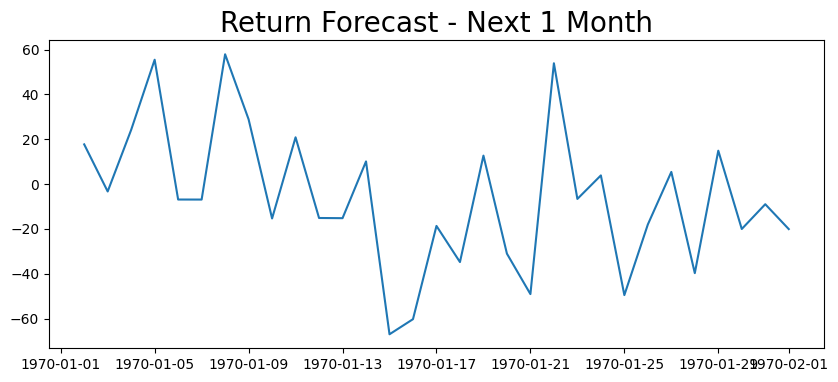

In [69]:
plt.figure(figsize=(10,4))
plt.plot(predicted_forecast)
plt.title('Return Forecast - Next 1 Month', fontsize=20)

In [70]:
hasil_forecast = pd.DataFrame(predicted_forecast, columns=['Forecast'])
hasil_forecast.to_excel("data_hasil_forecast_Garch.xlsx", index=False)
files.download("data_hasil_forecast_Garch.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
pt_1 = data['Harga'][699]
hasil_forecast_balik = np.r_[pt_1, predicted_forecast].cumsum()
A_hasil_forecast_balik = pd.DataFrame(hasil_forecast_balik, columns=['Forecast'])
hasil_forecast_balik

array([78630.        , 78647.71323993, 78644.41729036, 78668.6196317 ,
       78724.09378614, 78717.20687717, 78710.30251687, 78768.20664272,
       78797.10747035, 78781.77074691, 78802.63619719, 78787.51350294,
       78772.30769521, 78782.42046659, 78715.4257652 , 78655.16989805,
       78636.50921679, 78601.72948085, 78614.42847249, 78583.39839268,
       78534.32675187, 78588.21931503, 78581.59793976, 78585.47008935,
       78535.95322092, 78517.93309648, 78523.3577625 , 78483.63498429,
       78498.53249345, 78478.49970513, 78469.520008  , 78449.44901274])

In [72]:
A_hasil_forecast_balik.to_excel("data_hasil_forecast_Garch_trasnform_balik.xlsx", index=False)
files.download("data_hasil_forecast_Garch_trasnform_balik.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>